<a href="https://colab.research.google.com/github/prunojumah/Independent_Project_Week_14/blob/main/Independent_project_Week_13_Pruno_Jumah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Carrefour Kenya and are currently undertaking a project that will inform the marketing
department on the most relevant marketing strategies that will result in the highest no. of
sales (total price including tax).

Your project has been divided into three parts where you’ll explore a recent marketing
dataset by performing various unsupervised learning techniques and later providing
recommendations based on your insights

# Markdown Sections.
1.Problem Definition

2.Data Sourcing

3.Check the Data

4.Perform Data Cleaning

5.Perform Exploratory Data Analysis (Univariate, Bivariate & Multivariate)

6.Dimensionality Reduction

7.Feature 

8.Association Analysis

9.Anomaly Detection

10.Implement the Solution

11.Challenge the Solution

12.Recommendation

In [32]:
# Installing packages.

install.packages("devtools")
library(devtools)
install_github("vqv/ggbiplot")
install.packages("rtools")
install.packages("DataExplorer")
install.packages("Hmisc")
install.packages("pastecs")
install.packages("psych")
install.packages("corrplot")
install.packages("factoextra")
install.packages("caret")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rtools’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘DataExplorer’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Ins

In [33]:
# Loading the libraries
# specify the path where the file is 

library("data.table")
library(tidyverse)
library(magrittr)
library(warn = -1)
library("ggbiplot")
library(ggplot2)
library(lattice)
library(corrplot)
library(Hmisc)
library(pastecs)
library(psych)
library(factoextra)
library(caret)


In [34]:
# Loading the datasets
library("readr")

df_sales <- read.csv("/content/Supermarket_Dataset_1 - Sales Data.csv")
df_association <- read.csv("/content/Supermarket_Sales_Dataset II.csv")
df_forecast <- read.csv("/content/Supermarket_Sales_Forecasting - Sales.csv")
print(head(df_sales))


   Invoice.ID Branch Customer.type Gender           Product.line Unit.price
1 750-67-8428      A        Member Female      Health and beauty      74.69
2 226-31-3081      C        Normal Female Electronic accessories      15.28
3 631-41-3108      A        Normal   Male     Home and lifestyle      46.33
4 123-19-1176      A        Member   Male      Health and beauty      58.22
5 373-73-7910      A        Normal   Male      Sports and travel      86.31
6 699-14-3026      C        Normal   Male Electronic accessories      85.39
  Quantity     Tax      Date  Time     Payment   cogs gross.margin.percentage
1        7 26.1415  1/5/2019 13:08     Ewallet 522.83                4.761905
2        5  3.8200  3/8/2019 10:29        Cash  76.40                4.761905
3        7 16.2155  3/3/2019 13:23 Credit card 324.31                4.761905
4        8 23.2880 1/27/2019 20:33     Ewallet 465.76                4.761905
5        7 30.2085  2/8/2019 10:37     Ewallet 604.17                4.761905


In [35]:
print(head(df_association))


             shrimp      almonds    avocado   vegetables.mix green.grapes
1           burgers    meatballs       eggs                              
2           chutney                                                      
3            turkey      avocado                                         
4     mineral water         milk energy bar whole wheat rice    green tea
5    low fat yogurt                                                      
6 whole wheat pasta french fries                                         
  whole.weat.flour yams cottage.cheese energy.drink tomato.juice low.fat.yogurt
1                                                                              
2                                                                              
3                                                                              
4                                                                              
5                                                                              
6 

In [36]:
print(head(df_forecast))

       Date    Sales
1  1/5/2019 548.9715
2  3/8/2019  80.2200
3  3/3/2019 340.5255
4 1/27/2019 489.0480
5  2/8/2019 634.3785
6 3/25/2019 627.6165


# Data Cleaning

In [37]:
# Missing Values

sum(is.na(df_forecast))
## [1] 0
sum(is.na(df_association))

## [1] 7500
sum(is.na(df_sales))

## [1] 0
#There are 7500 missing values in the df_association dataset.


[1] 0

[1] 7500

[1] 0

In [38]:
# Finding the categories per column
print("Branch")

## [1] "Branch"
unique(df_sales$Branch)

## [1] A C B
## Levels: A B C
print("Customer Type")

## [1] "Customer Type"
unique(df_sales$Customer.type)
## [1] Member Normal
## Levels: Member Normal

print("Gender")
## [1] "Gender"
unique(df_sales$Gender)

## [1] Female Male
## Levels: Female Male
print("Product Line")

## [1] "Product Line"
# Convert data types using as.integer
# Branch
df_sales$Branch_E<-as.integer(as.factor(df_sales$Branch))

# Customer Type
df_sales$Customer_Type_E<-as.integer(as.factor(df_sales$Customer.type))

# Gender
df_sales$Gender_E<-as.integer(as.factor(df_sales$Gender))

# Product.line
df_sales$Product_Line_E<-as.integer(as.factor(df_sales$Product.line))

#Payment
df_sales$Payment_E<-as.integer(as.factor(df_sales$Payment))
library(lubridate)


[1] "Branch"


[1] "A" "C" "B"

[1] "Customer Type"


[1] "Member" "Normal"

[1] "Gender"


[1] "Female" "Male"

[1] "Product Line"


In [39]:
# Split date year, month and day.
# Convert to date datatype first then split thereafter

df_sales$Date <- as.Date(df_sales$Date, "%m/%d/%Y")
df_sales$year <- year(ymd(df_sales$Date))
df_sales$month <- month(ymd(df_sales$Date))
df_sales$day <- day(ymd(df_sales$Date))
df_sales$hour = format(strptime(df_sales$Time,"%H:%M"),'%H')
df_sales$minute = format(strptime(df_sales$Time,"%H:%M"),'%M')

#install.packages(dplyr)
library(dplyr)

df_sales_num <- select_if(df_sales,is.numeric)
str(df_sales_num)


'data.frame':	1000 obs. of  16 variables:
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.margin.percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross.income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total                  : num  549 80.2 340.5 489 634.4 ...
 $ Branch_E               : int  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer_Type_E        : int  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender_E               : int  1 1 2 2 2 2 1 1 1 1 ...
 $ Product_Line_E         : int  4 1 5 4 6 1 1 5 4 3 ...
 $ Payment_E              : int  3 1 2 3 3 3 3 3 2 2 ...
 $ year                   : num  2019 2019 2019 2019 2019 ...
 $ month                  : num  1 3 3 1 2 3 2 2 1 2 ...
 $ day                    : int  5 8 

In [40]:
# Identify the columns with zero column variance.
names(df_sales_num[, sapply(df_sales_num, function(v) var(v,
na.rm=TRUE)==0)])

# [1] "gross.margin.percentage" "year"
# Drop the columns as they result to error "stop("cannot rescale a
# constant/zero column to unit variance")"
df_sales_num <- subset(df_sales_num, select = -c(gross.margin.percentage,
year))
dim(df_sales_num)
# [1] 1000 14

[1] "gross.margin.percentage" "year"

[1] 1000   14

# Principal Component Analysis

In [41]:
df_pca <- prcomp(df_sales_num, center = TRUE, scale. = TRUE)
summary(df_pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2203 1.08227 1.06969 1.02580 1.00895 0.99359 0.97647
Proportion of Variance 0.3521 0.08367 0.08173 0.07516 0.07271 0.07052 0.06811
Cumulative Proportion  0.3521 0.43578 0.51751 0.59267 0.66538 0.73590 0.80401
                           PC8     PC9   PC10    PC11      PC12      PC13
Standard deviation     0.96596 0.94903 0.9057 0.29961 2.109e-16 9.849e-17
Proportion of Variance 0.06665 0.06433 0.0586 0.00641 0.000e+00 0.000e+00
Cumulative Proportion  0.87066 0.93499 0.9936 1.00000 1.000e+00 1.000e+00
                            PC14
Standard deviation     6.024e-17
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

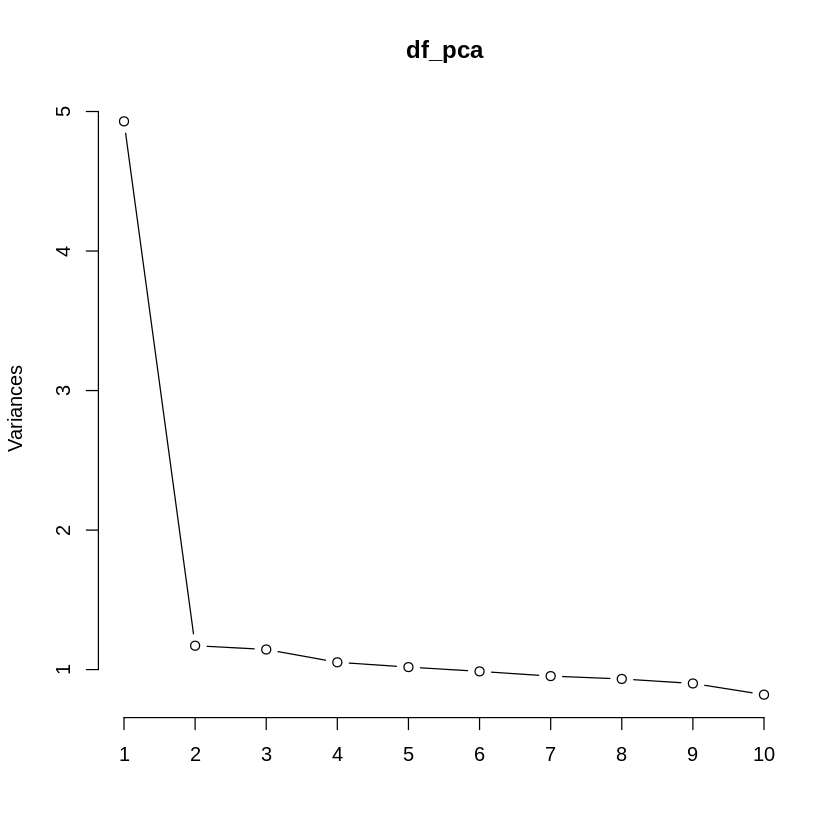

In [42]:
# Plotting the graph

plot(df_pca, type="l")

In [43]:
library(ggbiplot)

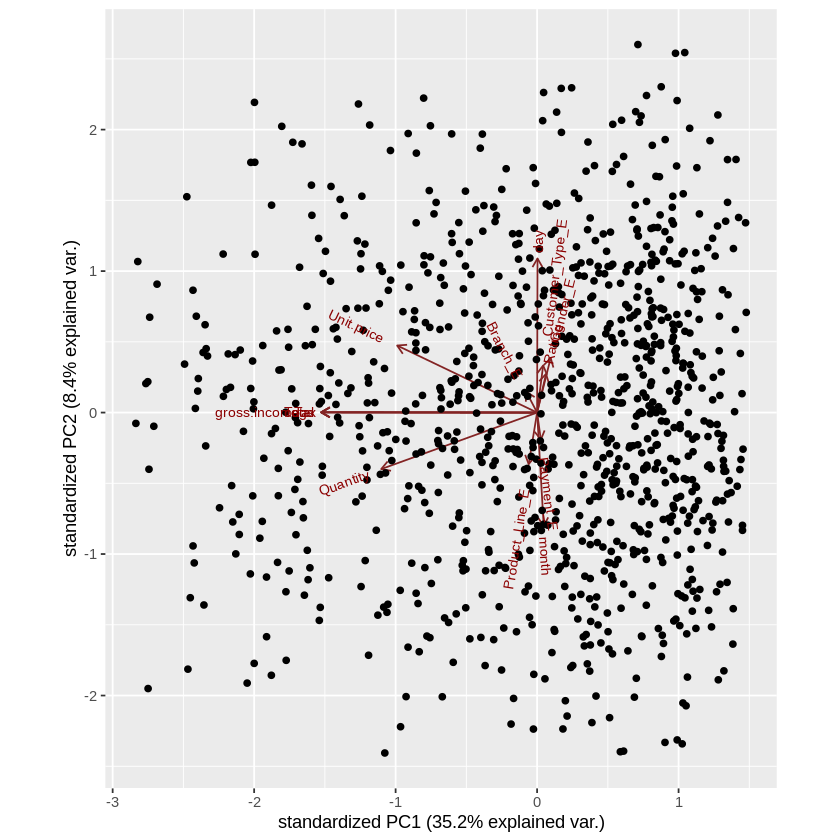

In [44]:
# Plotting the graph

ggbiplot(df_pca)

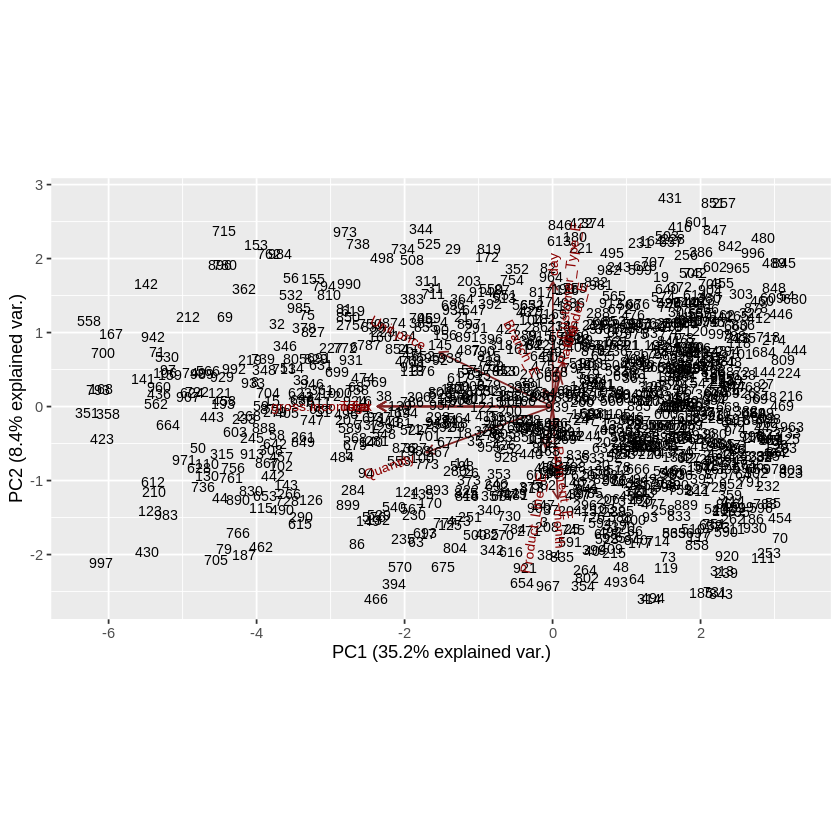

In [45]:
ggbiplot(df_pca, labels=rownames(df_sales_num), obs.scale = 1, var.scale = 1)

In [46]:
install.packages("Rtsne")
library(Rtsne)

tsne <- Rtsne(df_sales_num, dims = 2, perplexity=30, verbose=TRUE, max_iter =
500)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Performing PCA
Read the 1000 x 14 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.10 seconds (sparsity = 0.101248)!
Learning embedding...
Iteration 50: error is 59.260171 (50 iterations in 0.16 seconds)
Iteration 100: error is 52.276753 (50 iterations in 0.12 seconds)
Iteration 150: error is 51.277840 (50 iterations in 0.14 seconds)
Iteration 200: error is 50.872566 (50 iterations in 0.14 seconds)
Iteration 250: error is 50.616099 (50 iterations in 0.15 seconds)
Iteration 300: error is 0.618724 (50 iterations in 0.14 seconds)
Iteration 350: error is 0.452380 (50 iterations in 0.13 seconds)
Iteration 400: error is 0.407252 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.391284 (50 iterations in 0.13 seconds)
Iteration 500: error is 0.381456 (50 iterations in 0.12 seconds)
Fitting performed in 1.34 seconds.


In [47]:
# Changing the data type to integer

df_sales_num$Rating_num = as.integer(df_sales_num$Rating)

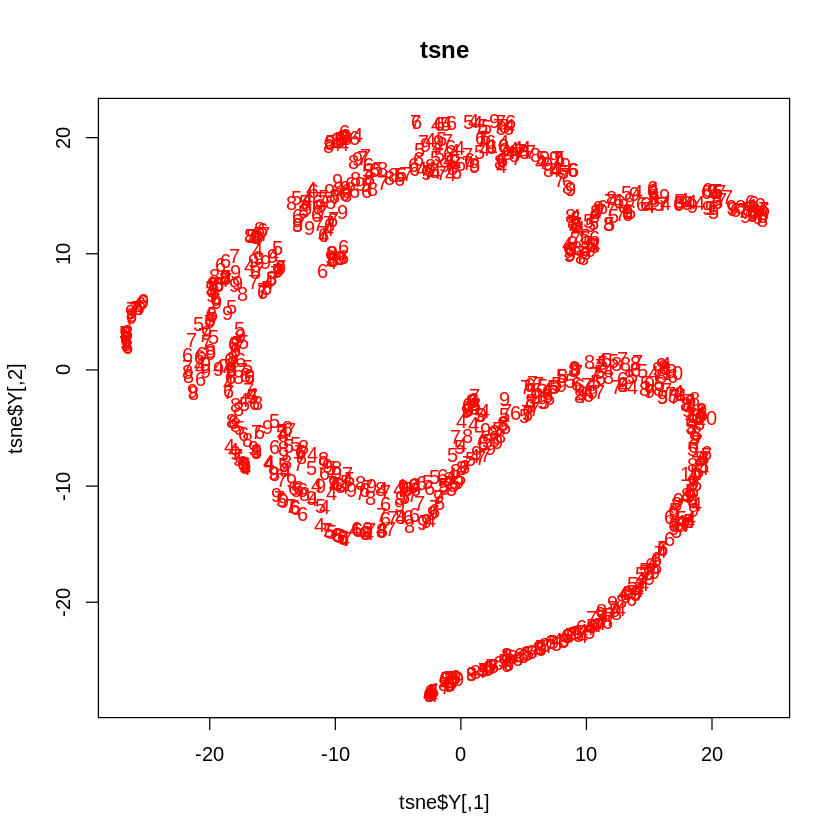

In [48]:
#Preparing the database for analysis
Labels<-df_sales_num$Rating_num
df_sales_num$Rating_num<-as.factor(df_sales_num$Rating_num)

# For plotting
colors = rainbow(length(df_sales_num$Rating_num))
names(colors) = unique(df_sales_num$Rating_num)
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=df_sales_num$Rating_num,
col=colors[df_sales_num$Rating_num])


In [49]:
path<-"http://bit.ly/FeatureSelectionDataset"

Dataset<-read.csv(path, sep = ",", dec = ".",row.names = 1)
Dataset<-Dataset[-4]
head(Dataset,3)


,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [50]:
library(corrplot)
## corrplot 0.84 loaded

library(caret)

## Loading required package: lattice
# Calculating the correlation matrix#
correlationMatrix <- cor(Dataset)

# Find attributes that are highly correlated
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.75)

# Highly correlated attributes
highlyCorrelated

## [1] 3 9 4
names(Dataset[,highlyCorrelated])


[1] 3 9 4

[1] "indus" "tax"   "nox"

In [51]:
# removing highly correlated variables
# We can remove the variables with a higher correlation
# and comparing the results graphically as shown below
# Removing Redundant Features

Dataset2<-Dataset[-highlyCorrelated]
head(Dataset2)


,crim,zn,rm,age,dis,rad,ptratio,b,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
2,0.02731,0,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
3,0.02729,0,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
4,0.03237,0,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
5,0.06905,0,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2
6,0.02985,0,6.430,58.7,6.0622,3,18.7,394.12,5.21,28.7


# Association Analysis

In [52]:
# View sample supermarket data on which we will run association rules

head(df_association)

,shrimp,almonds,avocado,vegetables.mix,green.grapes,whole.weat.flour,yams,cottage.cheese,energy.drink,tomato.juice,low.fat.yogurt,green.tea,honey,salad,mineral.water,salmon,antioxydant.juice,frozen.smoothie,spinach,olive.oil
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
1,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,NA
2,chutney,,,,,,,,,,,,,,,,,,,NA
3,turkey,avocado,,,,,,,,,,,,,,,,,,NA
4,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,NA
5,low fat yogurt,,,,,,,,,,,,,,,,,,,NA
6,whole wheat pasta,french fries,,,,,,,,,,,,,,,,,,NA


In [53]:
# Data dimensions

dim(df_association)


[1] 7500   20

In [54]:
#Structure

str(df_association)


'data.frame':	7500 obs. of  20 variables:
 $ shrimp           : chr  "burgers" "chutney" "turkey" "mineral water" ...
 $ almonds          : chr  "meatballs" "" "avocado" "milk" ...
 $ avocado          : chr  "eggs" "" "" "energy bar" ...
 $ vegetables.mix   : chr  "" "" "" "whole wheat rice" ...
 $ green.grapes     : chr  "" "" "" "green tea" ...
 $ whole.weat.flour : chr  "" "" "" "" ...
 $ yams             : chr  "" "" "" "" ...
 $ cottage.cheese   : chr  "" "" "" "" ...
 $ energy.drink     : chr  "" "" "" "" ...
 $ tomato.juice     : chr  "" "" "" "" ...
 $ low.fat.yogurt   : chr  "" "" "" "" ...
 $ green.tea        : chr  "" "" "" "" ...
 $ honey            : chr  "" "" "" "" ...
 $ salad            : chr  "" "" "" "" ...
 $ mineral.water    : chr  "" "" "" "" ...
 $ salmon           : chr  "" "" "" "" ...
 $ antioxydant.juice: chr  "" "" "" "" ...
 $ frozen.smoothie  : chr  "" "" "" "" ...
 $ spinach          : chr  "" "" "" "" ...
 $ olive.oil        : logi  NA NA NA NA NA NA ...

In [55]:
# Summary to show information such as the most purchased items,no. of items
# purchased in each transaction etc

summary(df_association)


    shrimp            almonds            avocado          vegetables.mix    
 Length:7500        Length:7500        Length:7500        Length:7500       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 green.grapes       whole.weat.flour       yams           cottage.cheese    
 Length:7500        Length:7500        Length:7500        Length:7500       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
 energy.drink       tomato.juice       low.fat.yogurt      green.tea        
 Length:7500        Length:7500        Length:7500        Length:7500       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
    honey              salad           mineral.water         salmon         

In [56]:
# Count the missing values

colSums(is.na(df_association))


shrimp           almonds           avocado    vegetables.mix 
                0                 0                 0                 0 
     green.grapes  whole.weat.flour              yams    cottage.cheese 
                0                 0                 0                 0 
     energy.drink      tomato.juice    low.fat.yogurt         green.tea 
                0                 0                 0                 0 
            honey             salad     mineral.water            salmon 
                0                 0                 0                 0 
antioxydant.juice   frozen.smoothie           spinach         olive.oil 
                0                 0                 0              7500

In [57]:
# Drop olive oil column from dataframe

df_association$olive.oil <- NULL

In [58]:
# Verify that column is successfully dropped

str(df_association)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write


Warning message:
“Column(s) 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 not logical or factor. Applying default discretization (see '? discretizeDF').”


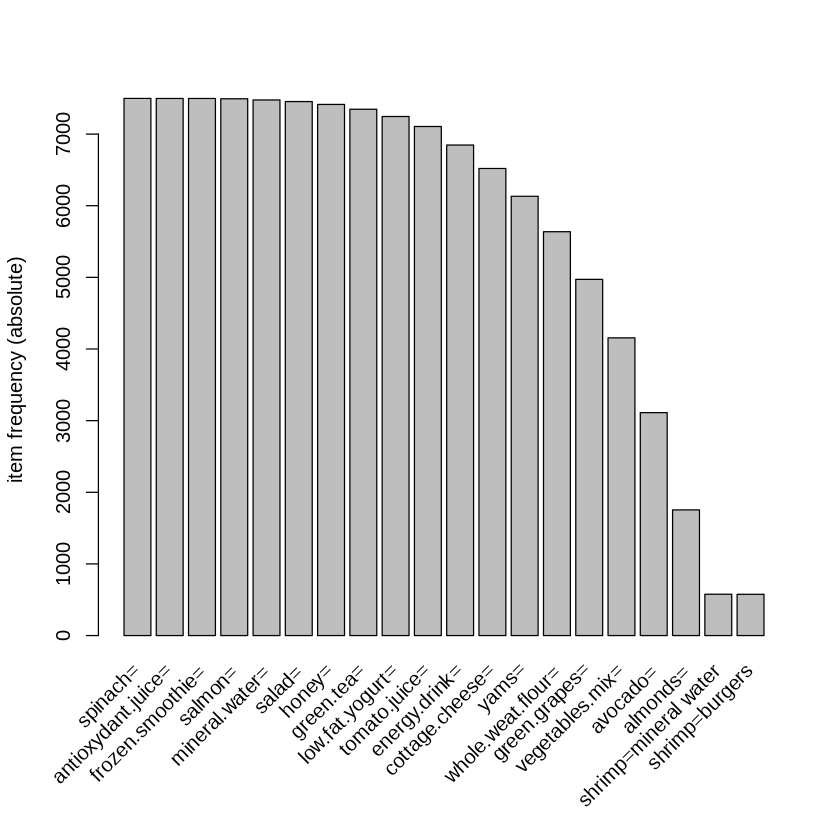

In [63]:
install.packages("arules")
library(arules)

## Create an item frequency plot for the top 20 items
# coerce data frame into transaction. Plotting the dataframe directly fails
transact <- as(df_association, "transactions")

# plot item frequency
itemFrequencyPlot(transact,topN=20,type="absolute")


In [64]:
# Rules for Association

tail(df_association)

,shrimp,almonds,avocado,vegetables.mix,green.grapes,whole.weat.flour,yams,cottage.cheese,energy.drink,tomato.juice,low.fat.yogurt,green.tea,honey,salad,mineral.water,salmon,antioxydant.juice,frozen.smoothie,spinach
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
7495,pancakes,light mayo,,,,,,,,,,,,,,,,,
7496,butter,light mayo,fresh bread,,,,,,,,,,,,,,,,
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,,,,,,,,,,,,,
7498,chicken,,,,,,,,,,,,,,,,,,
7499,escalope,green tea,,,,,,,,,,,,,,,,,
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,,,,,,,,,,,,,,,


In [65]:
# Get the rules

rules <- apriori(df_association, parameter = list(supp = 0.5, conf =
0.8,target = "rules",minlen=2))


Warning message:
“Column(s) 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 not logical or factor. Applying default discretization (see '? discretizeDF').”


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.5      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3750 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1280 item(s), 7500 transaction(s)] done [0.05s].
sorting and recoding items ... [16 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 9 10

Warning message in apriori(df_association, parameter = list(supp = 0.5, conf = 0.8, :
“Mining stopped (maxlen reached). Only patterns up to a length of 10 returned!”


 done [0.02s].
writing ... [425218 rule(s)] done [0.09s].
creating S4 object  ... done [0.18s].


In [66]:

#rules <- sort(rules, by="lift", decreasing=TRUE)

summary(rules)

set of 425218 rules

rule length distribution (lhs + rhs):sizes
    2     3     4     5     6     7     8     9    10 
  204  1478  6576 20134 45002 75943 98616 99417 77848 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   7.000   8.000   7.986   9.000  10.000 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.5541   Min.   :0.8108   Min.   :0.5541   Min.   :1.000  
 1st Qu.:0.5541   1st Qu.:1.0000   1st Qu.:0.5541   1st Qu.:1.001  
 Median :0.6629   Median :1.0000   Median :0.6629   Median :1.021  
 Mean   :0.6455   Mean   :0.9882   Mean   :0.6545   Mean   :1.095  
 3rd Qu.:0.7516   3rd Qu.:1.0000   3rd Qu.:0.7516   3rd Qu.:1.150  
 Max.   :0.9996   Max.   :1.0000   Max.   :0.9997   Max.   :1.508  
     count     
 Min.   :4156  
 1st Qu.:4156  
 Median :4972  
 Mean   :4841  
 3rd Qu.:5637  
 Max.   :7497  

mining info:
           data ntransactions support confidence
 df_association          7500     0.5        0

In [67]:
# Show the top 3 rules, but only 2 digits.
# options(digits=2)

inspect(rules[1:20])

     lhs                    rhs                  support   confidence coverage 
[1]  {vegetables.mix=}   => {green.grapes=}      0.5541333 1.0000000  0.5541333
[2]  {green.grapes=}     => {vegetables.mix=}    0.5541333 0.8358809  0.6629333
[3]  {vegetables.mix=}   => {whole.weat.flour=}  0.5541333 1.0000000  0.5541333
[4]  {vegetables.mix=}   => {yams=}              0.5541333 1.0000000  0.5541333
[5]  {vegetables.mix=}   => {cottage.cheese=}    0.5541333 1.0000000  0.5541333
[6]  {vegetables.mix=}   => {energy.drink=}      0.5541333 1.0000000  0.5541333
[7]  {vegetables.mix=}   => {tomato.juice=}      0.5541333 1.0000000  0.5541333
[8]  {vegetables.mix=}   => {low.fat.yogurt=}    0.5541333 1.0000000  0.5541333
[9]  {vegetables.mix=}   => {green.tea=}         0.5541333 1.0000000  0.5541333
[10] {vegetables.mix=}   => {honey=}             0.5541333 1.0000000  0.5541333
[11] {vegetables.mix=}   => {salad=}             0.5541333 1.0000000  0.5541333
[12] {vegetables.mix=}   => {mineral.wat

## Anomaly Detection

In [70]:
# Anormally detection

install.packages("anomalize") 
library(anomalize)
library(lubridate)
library(tibbletime)

# View the data to check anormalies on
head(df_forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘TTR’, ‘future’, ‘globals’, ‘quadprog’, ‘quantmod’, ‘furrr’, ‘modeldata’, ‘hexbin’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘zoo’, ‘slider’, ‘anytime’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’


══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>


Attaching package: ‘tibbletime’


The following object is masked from ‘package:stats’:

    filter




,Date,Sales
,<chr>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [68]:
str(df_forecast)

In [71]:
# totalling the sales based on their common shared dates

sales_aggregate <- aggregate(df_forecast$Sales, by = list(Date =
df_forecast$Date), FUN = sum)
head(sales_aggregate)

,Date,x
,<chr>,<dbl>
1,1/1/2019,4745.181
2,1/10/2019,3560.949
3,1/11/2019,2114.963
4,1/12/2019,5184.764
5,1/13/2019,2451.204
6,1/14/2019,3966.617


In [72]:
# getting a data frame of the frequency table of Date

date_table <- data.frame(table(df_forecast$Date))
head(date_table)


,Var1,Freq
,<fct>,<int>
1,1/1/2019,12
2,1/10/2019,9
3,1/11/2019,8
4,1/12/2019,11
5,1/13/2019,10
6,1/14/2019,13


In [73]:
library(tidyverse)
library(anomalize)


In [74]:
library(lubridate)
library(tibbletime)

# combining both data frames
final_df <- merge(sales_aggregate, date_table, by.x = "Date", by.y = "Var1")

# renaming the columns
names(final_df) <- c("Date", "Total.Sales", "count")
head(final_df)


,Date,Total.Sales,count
,<chr>,<dbl>,<int>
1,1/1/2019,4745.181,12
2,1/10/2019,3560.949,9
3,1/11/2019,2114.963,8
4,1/12/2019,5184.764,11
5,1/13/2019,2451.204,10
6,1/14/2019,3966.617,13


In [75]:

# changing the Date column to Date 

final_df$Date <- mdy(final_df$Date)
str(final_df)


'data.frame':	89 obs. of  3 variables:
 $ Date       : Date, format: "2019-01-01" "2019-01-10" ...
 $ Total.Sales: num  4745 3561 2115 5185 2451 ...
 $ count      : int  12 9 8 11 10 13 13 10 11 9 ...


In [76]:
final_df$Date <- as_tbl_time(final_df, index = 'Date')
str(final_df$Date)

tibble [89 × 3] (S3: tbl_time/tbl_df/tbl/data.frame)
 $ Date       : Date[1:89], format: "2019-01-01" "2019-01-10" ...
 $ Total.Sales: num [1:89] 4745 3561 2115 5185 2451 ...
 $ count      : int [1:89] 12 9 8 11 10 13 13 10 11 9 ...
 - attr(*, "index_quo")= language ~"Date"
  ..- attr(*, ".Environment")=<environment: R_EmptyEnv> 
 - attr(*, "index_time_zone")= chr "UTC"


In [77]:
class(final_df)


[1] "data.frame"

# Conclusions

Trend line shows that sales were constant through the three months.

No anomalies detected.

